In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

In [91]:
data = pd.read_csv(r"F:\anlas\Python ile Makine Öğrenmesi\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data2 = data.copy()
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [92]:
# adjusting columns and controlling of the variables
data2.drop(columns="customerID",axis=1,inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [93]:
# Total charges is object 
data2["TotalCharges"] = pd.to_numeric(data2["TotalCharges"],errors="coerce")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [94]:
# Missing value checking
print(data2.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [95]:
# we cannot explore the reason of NaN values
# We can drop them 
data2 = data2.dropna()
print(data2.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


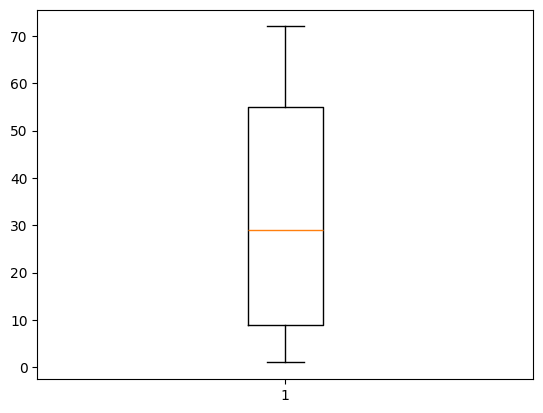

In [96]:
# Checking Outlier with related columns ( tenure )
plt.boxplot(data2["tenure"])
plt.show()

In [101]:
# Encoding 

columnNames = data2.select_dtypes(include="object").columns

# Encoder 
le = LabelEncoder()
"""data2.update(data2[columnNames].apply(le.fit_transform))
data2.head()
This should have worked but in my pc it's not working
"""
for col in columnNames:
    data2[col] = le.fit_transform(data2[col])
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

In [102]:
# Splitting data
y = data2["Churn"]
X = data2.drop(columns="Churn",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

# Scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
clf = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None,random_state=3)
scores, preds = clf.fit(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
scores.sort_values(by="Accuracy",ascending=False)

100%|██████████| 31/31 [00:09<00:00,  3.16it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.81,0.72,0.72,0.80,0.34
CalibratedClassifierCV,0.81,0.72,0.72,0.80,0.09
LinearSVC,0.80,0.72,0.72,0.80,0.03
LogisticRegression,0.80,0.72,0.72,0.80,0.02
SVC,0.80,0.69,0.69,0.79,1.19
RidgeClassifier,0.80,0.70,0.70,0.79,0.03
LinearDiscriminantAnalysis,0.80,0.72,0.72,0.79,0.03
RidgeClassifierCV,0.80,0.70,0.70,0.79,0.03
NuSVC,0.79,0.67,0.67,0.78,1.52


<BarContainer object of 27 artists>

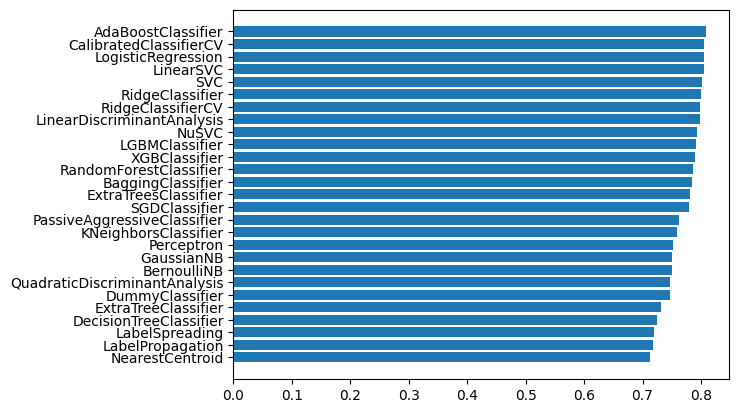

In [ ]:
lazyData = scores.sort_values(by="Accuracy",ascending=True)
plt.barh(lazyData.index, lazyData["Accuracy"])
# With this usage we can take an insight about the models for data

In [121]:
modelnames = ["LinearSVC",  "RandomForestClassifier", "GaussianNB",
              "XGBClassifier", "LogisticRegression", "RidgeClassifier"]
# "SVC",
    #SVC(random_state=3),
models = [
    LinearSVC(random_state=3),

    RandomForestClassifier(random_state=3),
    GaussianNB(),
    XGBClassifier(random_state=3),
    LogisticRegression(random_state=3, solver='liblinear'),
    RidgeClassifier(random_state=3)
]

params = {
    modelnames[0]: {"C": [0.1, 1, 10, 100], "penalty": ["l2"]},  # penalty "l1" için solver='liblinear' gerek
    #modelnames[1]: {"kernel": ["linear", "rbf"], "C": [0.1, 1], "gamma": [0.01, 0.1]},
    modelnames[1]: {"n_estimators": [100, 200], "max_depth": [4, 10], "min_samples_split": [2, 5]},
    modelnames[2]: {},  # GaussianNB için parametre yok
    modelnames[3]: {"n_estimators": [30, 50], "max_depth": [4, 10], "learning_rate": [0.01, 0.1]},
    modelnames[4]: {"C": [0.1, 1, 10], "penalty": ["l1", "l2"], "solver": ["liblinear"]},
    modelnames[5]: {"alpha": [0.1, 1.0, 10.0]}  # RidgeClassifier için uygun parametre
}

In [111]:
def fitting(model):
    model.fit(X_train,y_train)
    return model

def scoring(model2):
    preds = fitting(model2).predict(X_test)
    return accuracy_score(y_test,preds)*100

In [ ]:
for i,j in zip(modelnames,models):
    print(i)
    grid = GridSearchCV(fitting(j),param_grid=params[i],cv=4,n_jobs=-1)
    grid.fit(X_train,y_train)
    print(grid.best_params_)
    # SVC is too long, I got error.

LinearSVC
{'C': 1, 'penalty': 'l2'}
RandomForestClassifier
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
GaussianNB
{}
XGBClassifier
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 30}
LogisticRegression
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
RidgeClassifier
{'alpha': 0.1}


In [123]:
modelsWithParams = [
    LinearSVC(C= 1, penalty= 'l2',random_state=3),
    SVC(),
    RandomForestClassifier(max_depth= 10, min_samples_split= 2, n_estimators= 200,random_state=3),
    GaussianNB(),
    XGBClassifier(learning_rate= 0.1, max_depth= 4, n_estimators= 30,random_state=3),
    LogisticRegression(C= 10, penalty= 'l2',random_state=3, solver='liblinear'),
    RidgeClassifier(alpha= 0.1,random_state=3)
]
acc = []
for i in modelsWithParams:
    acc.append(scoring(i))
a = pd.DataFrame(list(zip(modelnames,acc)),columns=["Model","Accuracy Score"])
print(a.sort_values("Accuracy Score",ascending=False))


                    Model  Accuracy Score
4      LogisticRegression           80.60
0               LinearSVC           80.38
5         RidgeClassifier           80.38
2              GaussianNB           79.82
3           XGBClassifier           74.98
1  RandomForestClassifier           74.70
